In [1]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

asset = catalog.get_collection("gridmet").assets["zarr-abfs"]
asset

<Asset href=abfs://gridmet/gridmet.zarr>

In [2]:
import xarray as xr

ds = xr.open_zarr(
    asset.href,
    storage_options=asset.extra_fields["xarray:storage_options"],
    **asset.extra_fields["xarray:open_kwargs"],
    chunks={"time": 365, "lat": 100, "lon": 100}  # Customize as needed
)


c:\Users\SABIO\anaconda3\envs\capstone\lib\site-packages\xarray\core\dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 365. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\SABIO\anaconda3\envs\capstone\lib\site-packages\xarray\core\dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\SABIO\anaconda3\envs\capstone\lib\site-packages\xarray\core\dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [2]:
import xarray as xr

ds = xr.open_zarr(
    asset.href,
    storage_options=asset.extra_fields["xarray:storage_options"],
    **asset.extra_fields["xarray:open_kwargs"]
)
ds

<xarray.Dataset> Size: 597GB
Dimensions:                                    (time: 15341, lat: 585,
                                                lon: 1386, crs: 1)
Coordinates:
  * crs                                        (crs) uint16 2B 3
  * lat                                        (lat) float64 5kB 49.4 ... 25.07
  * lon                                        (lon) float64 11kB -124.8 ... ...
  * time                                       (time) datetime64[ns] 123kB 19...
Data variables:
    air_temperature                            (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    burning_index_g                            (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    dead_fuel_moisture_1000hr                  (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    dead_fuel_moisture_100hr                   (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    mean_vapor_pressure_deficit                (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    potential_evapotranspiration               (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    precipitation_amount                       (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    relative_humidity                          (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    specific_humidity                          (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    wind_from_direction                        (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    wind_speed                                 (time, lat, lon) float32 50GB dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host')>
Traceback (most recent call last):
  File "c:\Users\SABIO\anaconda3\envs\capstone\lib\asyncio\selector_events.py", line 854, in _read_ready__data_received
    data = self._sock.recv(self.max_size)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

The above exception was the direct cause of the following exception:

aiohttp.client_exceptions.ClientConnectionError: Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host
Future exception was never retrieved
future: <Future finished exception=ClientConnectionError('Connection lost: [WinError 10054] An existing connection was forcibly closed by the remote host')>
Traceback (most recent call last):
  File "c:\Users\SABIO\anaconda3\envs\capstone\lib\asyncio\sele

In [3]:
ds.chunks

Frozen({'time': (30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,

In [5]:
ds.air_temperature.attrs

{'coordinate_system': 'WGS84,EPSG:4326',
 'description': 'Daily Minimum Temperature',
 'dimensions': 'lon lat time',
 'grid_mapping': 'crs',
 'long_name': 'tmmn',
 'standard_name': 'tmmn',
 'units': 'K'}

In [14]:
ds.sel(lon=32, lat=-119, method='nearest')

<xarray.Dataset> Size: 859kB
Dimensions:                                    (time: 15341, crs: 1)
Coordinates:
  * crs                                        (crs) uint16 2B 3
    lat                                        float64 8B 25.07
    lon                                        float64 8B -67.06
  * time                                       (time) datetime64[ns] 123kB 19...
Data variables:
    air_temperature                            (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    burning_index_g                            (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    dead_fuel_moisture_1000hr                  (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    dead_fuel_moisture_100hr                   (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    mean_vapor_pressure_deficit                (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    potential_evapotranspiration               (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    precipitation_amount                       (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    relative_humidity                          (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    specific_humidity                          (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    wind_from_direction                        (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
    wind_speed                                 (time) float32 61kB dask.array<chunksize=(30,), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [15]:
ds.sel(lon=[32,34], lat=[-119,-120], method='nearest')

<xarray.Dataset> Size: 3MB
Dimensions:                                    (time: 15341, lat: 2, lon: 2,
                                                crs: 1)
Coordinates:
  * crs                                        (crs) uint16 2B 3
  * lat                                        (lat) float64 16B 25.07 25.07
  * lon                                        (lon) float64 16B -67.06 -67.06
  * time                                       (time) datetime64[ns] 123kB 19...
Data variables:
    air_temperature                            (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    burning_index_g                            (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    dead_fuel_moisture_1000hr                  (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    dead_fuel_moisture_100hr                   (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    mean_vapor_pressure_deficit                (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    potential_evapotranspiration               (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    precipitation_amount                       (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    relative_humidity                          (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    specific_humidity                          (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    wind_from_direction                        (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
    wind_speed                                 (time, lat, lon) float32 245kB dask.array<chunksize=(30, 2, 2), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [23]:
ds.air_temperature.isel(lat=slice(10))

<xarray.DataArray 'air_temperature' (time: 15341, lat: 10, lon: 1386)> Size: 851MB
dask.array<getitem, shape=(15341, 10, 1386), dtype=float32, chunksize=(30, 10, 1386), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 80B 49.4 49.36 49.32 49.28 ... 49.11 49.07 49.03
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * time     (time) datetime64[ns] 123kB 1979-01-01 1979-01-02 ... 2020-12-31
Attributes:
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Minimum Temperature
    dimensions:         lon lat time
    grid_mapping:       crs
    long_name:          tmmn
    standard_name:      tmmn
    units:              K

In [4]:
# Find closest lat/lon indices manually
print(ds.lat.values[300])  # See approx lat
print(ds.lon.values[700])  # See approx lon

36.900000000000006
-95.59999996666667


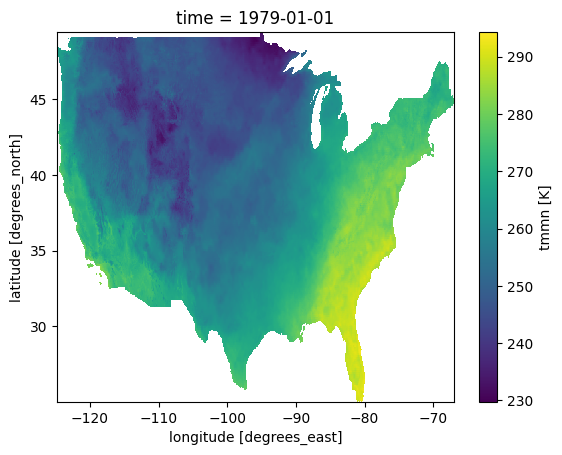

In [5]:
import matplotlib

ds.air_temperature.isel(time = 0).plot()

<Axes: xlabel='time'>

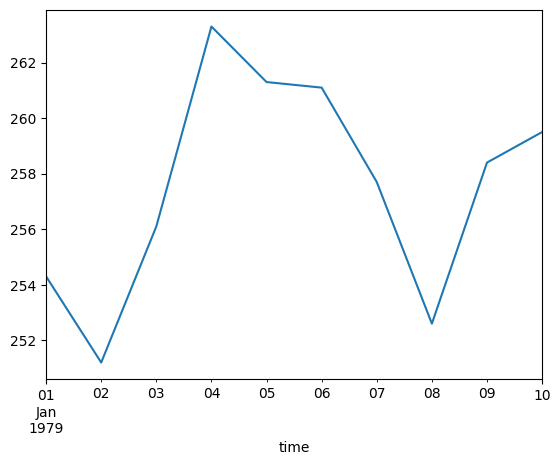

In [6]:
# One variable
temp = ds["air_temperature"]

# Pick the first 10 days at a single location
mini = temp.isel(lat=300, lon=700, time=slice(0, 10))  # Smallest slice

# Convert to Series and plot
mini_ts = mini.to_series()
mini_ts.plot()

In [7]:
ds.chunks

Frozen({'time': (365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 11), 'lat': (100, 100, 100, 100, 100, 85), 'lon': (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 86)})

In [8]:
chunk = ds["air_temperature"][:30].compute()

(array([  22625.,  340062., 1284023., 2474153., 2990667., 3361241.,
        2754717.,  945009.,  301081.,   42792.]),
 array([229.80000305, 236.25      , 242.69999695, 249.1499939 ,
        255.59999084, 262.04998779, 268.5       , 274.94998169,
        281.3999939 , 287.84997559, 294.29998779]),
 <BarContainer object of 10 artists>)

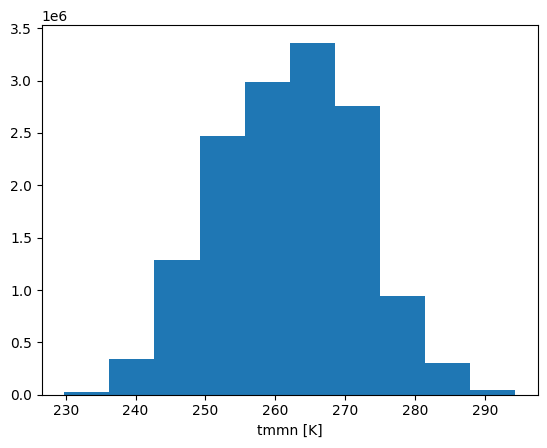

In [9]:
chunk.plot()

In [10]:
import dask
dask.config.set(scheduler="threads")  # or "processes"


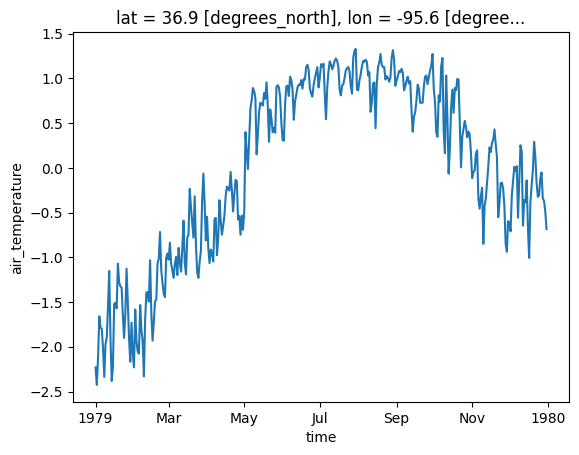

In [12]:
# 1. Lazy slicing (no loading yet)
ts = ds["air_temperature"].isel(lat=300, lon=700).isel(time=slice(0, 365))

# 2. Do some lazy operations (still nothing loaded)
ts_normalized = (ts - ts.mean()) / ts.std()

# 3. Now actually load the result into memory
ts_final = ts_normalized.compute()

# 4. At this point, ts_final is a NumPy-backed array and ready for plotting, ML, etc.
ts_normalized.plot()

In [15]:
test = ds[['air_temperature', 'specific_humidity']].isel(lat=300, lon=700).isel(time=slice(0, 365))

test.compute()

<xarray.Dataset> Size: 6kB
Dimensions:            (time: 365)
Coordinates:
    lat                float64 8B 36.9
    lon                float64 8B -95.6
  * time               (time) datetime64[ns] 3kB 1979-01-01 ... 1979-12-31
Data variables:
    air_temperature    (time) float32 1kB 254.3 251.2 256.1 ... 281.9 278.7
    specific_humidity  (time) float32 1kB 0.00088 0.00077 ... 0.00318 0.00322
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

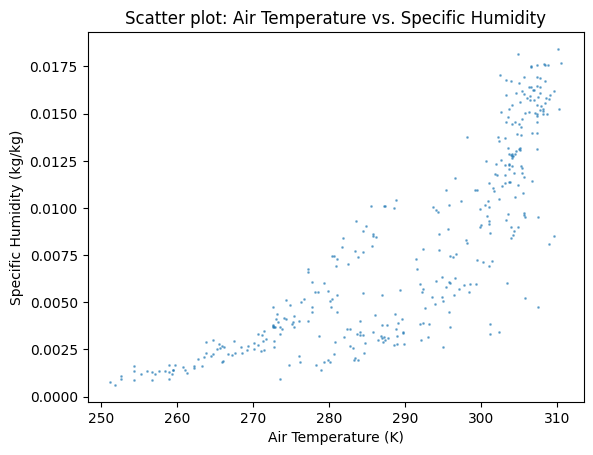

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the arrays to 1D (if they are multidimensional)
x = test['air_temperature'].values.flatten()
y = test['specific_humidity'].values.flatten()

# Optionally, mask out NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

plt.scatter(x, y, alpha=0.5, s=1)
plt.xlabel('Air Temperature (K)')
plt.ylabel('Specific Humidity (kg/kg)')
plt.title('Scatter plot: Air Temperature vs. Specific Humidity')
plt.show()